In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.8e20]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandX3,bandX3,bandX3],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
Ec0(1.0)

-0.165

In [4]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 25.882935 seconds (102.49 M allocations: 27.601 GiB, 10.99% gc time)


3.0

In [5]:
foreach(x->println(x," ", kees[x,1,1]),1:length(sigmaes[:,:,1]))

1 1.450736138306472
2 1.4483985258654537
3 1.4464736964805036
4 1.444866611683314
5 1.4434855078995785
6 1.4422463969492645
7 1.4410743594766307
8 1.4399043102895344
9 1.438683312836972
10 1.437364646281316
11 1.435913981158078
12 1.4343021806574747
13 1.4325083559292904
14 1.430516999362753
15 1.4283173007202807
16 1.425904726068515
17 1.423276219143159
18 1.4204311658714415
19 1.4173732248613684
20 1.4141074500117108
21 1.4106391052849052
22 1.4069756988667943
23 1.4031258962556938
24 1.3990992754106513
25 1.3949045885466842
26 1.3905534532946877
27 1.3860563531341996
28 1.3814248271450325
29 1.3766706020617332
30 1.3718062984938766
31 1.3668440917515023
32 1.3618312131081804
33 1.3567402415085343
34 1.3515938134323138
35 1.3464077787328872
36 1.3412003382150868
37 1.3359886553331508
38 1.3307911019668697
39 1.3256264632996202
40 1.320515242169698
41 1.31547951259234
42 1.3105413898032134
43 1.3057250061386148
44 1.301055679556844
45 1.2965604805782465
46 1.2922674319297225
47 1.2882

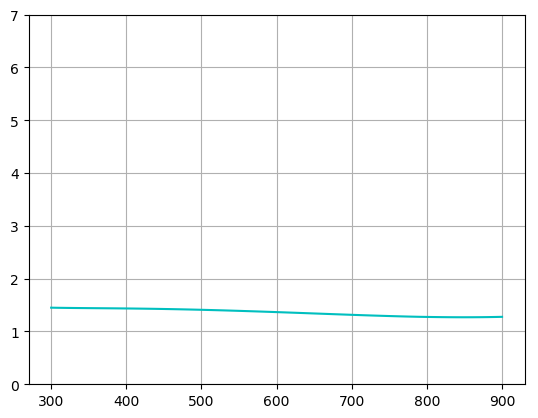

In [6]:
plot(Ts,kees[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [7]:
foreach(x->println(x," ", kbis[x,1,1]),1:length(sigmaes[:,:,1]))

1 3.5894657032637494e-8
2 8.673045021665832e-8
3 1.9720932309027008e-7
4 4.248137429315387e-7
5 8.718274212847337e-7
6 1.4627669692620431e-6
7 2.613296966826758e-6
8 4.624074057422837e-6
9 8.001934640137596e-6
10 1.3514669118315876e-5
11 2.2283524375210825e-5
12 3.5906912988336806e-5
13 5.661561342363453e-5
14 8.746333064442761e-5
15 0.00013255650480000072
16 0.00019732667316549606
17 0.0002888498358719258
18 0.00041621476646841135
19 0.0005914740200835941
20 0.000843528668251456
21 0.001191326101508809
22 0.00166442931814625
23 0.002299958152241721
24 0.003143459166923034
25 0.0042501393514559884
26 0.005686174164835993
27 0.007530101932418143
28 0.009874251090132097
29 0.012826213982831305
30 0.015535737831364235
31 0.019440143589583694
32 0.024282680421299854
33 0.030179598409343356
34 0.03729145759249372
35 0.04580449476073524
36 0.05592764089241145
37 0.06789239021000315
38 0.08195304321958206
39 0.09838714087929866
40 0.1174956501073231
41 0.1396029856226676
42 0.1650569345396134

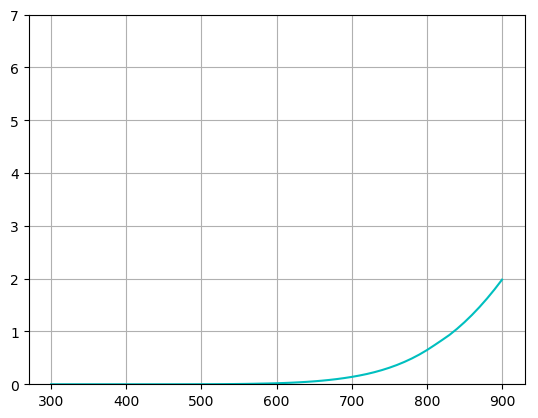

In [8]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [9]:
foreach(x->println(x," ", seebecks[x,1,1], "   es ",seebeckes[x,1,1],"   hs ",seebeckhs[x,1,1]),1:length(sigmaes[:,:,1]))

1 -0.00011563430966550827   es -0.00011563430995931527   hs 0.002000748874823537
2 -0.00011826426016620525   es -0.00011826426088539458   hs 0.0019283834856213286
3 -0.00012091283992892352   es -0.00012091284158601606   hs 0.0018619355653552438
4 -0.00012357315210220795   es -0.0001235731557203138   hs 0.0018004823493108911
5 -0.00012623888227692416   es -0.0001262388898050186   hs 0.0017433328195061986
6 -0.00012890432674287229   es -0.00012890433942136306   hs 0.0017085910583869066
7 -0.00013156441633532174   es -0.00013156443921812287   hs 0.0016651457663449992
8 -0.00013421471503418525   es -0.00013421475601802654   hs 0.001621240591907282
9 -0.00013685130636522633   es -0.00013685137821225213   hs 0.0015786516348757925
10 -0.0001394709471702364   es -0.0001394710701526137   hs 0.001537789770732433
11 -0.0001420707713987418   es -0.00014207097697068371   hs 0.0014987357380319688
12 -0.00014464847306582223   es -0.00014464880893815497   hs 0.001461456607134779
13 -0.0001472021041120

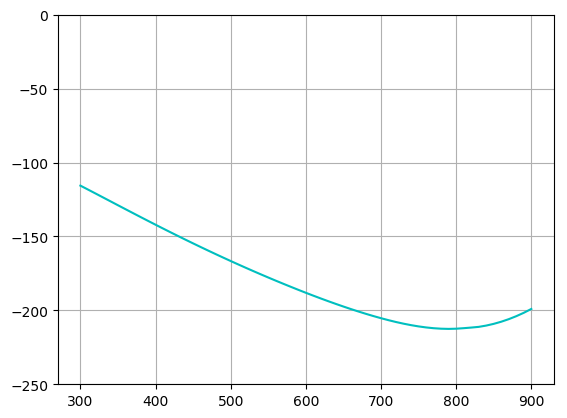

In [10]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
ylim(-250,-0)
grid()

In [11]:
foreach(x->println(x," ", sigmas[x,1,1], "   es ",sigmaes[x,1,1],"   hs ",sigmahs[x,1,1]),1:length(sigmaes[:,:,1]))

1 192420.84383732543   es 192420.8438106126   hs 2.6712832984785225e-5
2 190074.3764914156   es 190074.3764246237   hs 6.679188555326973e-5
3 187560.41743653218   es 187560.41727978547   hs 0.00015674671178178995
4 184920.79708749452   es 184920.7967397587   hs 0.00034773581742518814
5 182189.95315786422   es 182189.95242425066   hs 0.0007336135666241449
6 179396.2188725061   es 179396.21763469442   hs 0.0012378117004963815
7 176562.73538746542   es 176562.73313877225   hs 0.0022486931649230374
8 173708.3194490489   es 173708.31539355742   hs 0.004055491474289191
9 170848.488649104   es 170848.48149379404   hs 0.007155309948322339
10 167995.38471772472   es 167995.37239974097   hs 0.012317983751809952
11 165159.16563911407   es 165159.14494679845   hs 0.020692315609221627
12 162347.65734845   es 162347.62339794723   hs 0.03395050277493357
13 159567.20302184252   es 159567.14854825343   hs 0.05447358907511618
14 156822.7261177799   es 156822.6405333056   hs 0.08558447432050925
15 154118

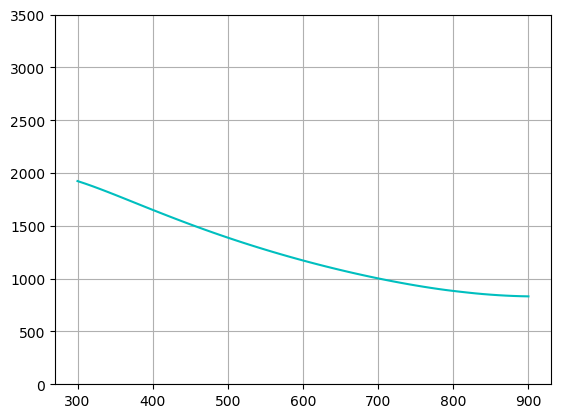

In [12]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
ylim(0,3500)
grid()

In [13]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [14]:
foreach(x->println(x," EX3 ", Efsr[x,1,1]," EX1 ", Efsr[x,1,1]-Ec0(0.6)),1:length(Efsr[:,:,1]))

1 EX3 0.10134898435842477 EX1 0.04034898435842474
2 EX3 0.10054958176419326 EX1 0.03954958176419324
3 EX3 0.09972550488509757 EX1 0.038725504885097545
4 EX3 0.09887685776369182 EX1 0.03787685776369179
5 EX3 0.0980037344150757 EX1 0.03700373441507568
6 EX3 0.09710625248147142 EX1 0.036106252481471396
7 EX3 0.09618451880719636 EX1 0.035184518807196336
8 EX3 0.09523862879663181 EX1 0.03423862879663178
9 EX3 0.09426876981768384 EX1 0.03326876981768381
10 EX3 0.09327497881415159 EX1 0.03227497881415156
11 EX3 0.09225745354340553 EX1 0.031257453543405506
12 EX3 0.09121627460805382 EX1 0.03021627460805379
13 EX3 0.09015157886513503 EX1 0.029151578865135003
14 EX3 0.08906348942039166 EX1 0.028063489420391635
15 EX3 0.08795211498623434 EX1 0.026952114986234316
16 EX3 0.08681765598178792 EX1 0.025817655981787896
17 EX3 0.08566022727145572 EX1 0.024660227271455698
18 EX3 0.08447992791381598 EX1 0.02347992791381595
19 EX3 0.08327694841734701 EX1 0.02227694841734698
20 EX3 0.08205146374151528 EX1 0

In [15]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
con=1.0
thetaL=52.3e12*hbar/kB # K 
thetaT=29.7e12*hbar/kB  # K
vL=(1-con)*7700+con*4900    # m/s
vT=(1-con)*4900+con*3000    # m/s
gammaL=2.5*(1-con)+1.7*con
gammaT=2.5*(1-con)+1.7*con
M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
a=V^(1.0/3.0)
ro=M/V
Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
jL=vL/7700*Vdj
jT=vT/4900*Vdj
thetaLx=thetaL*jL
thetaTx=thetaT*jT
##########Boundary Scattering###############3
D=11e-9
p=0.65
##########Alloy Scattering###################
mbar=(28.0855*(1-con)+118.71*con)
GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
##########Electron Scattering###################
Eep=5.0*q
xsp=xs[1]
Tp=300.0
mdx1=0.67*me
mdx3=0.38*me
Efx3=0.2589
Efx1=0.2589
##########Nanoparticle Scattering###################
NP=0
#alpha=1.0
d=97.0e-9#
Vnp=4/3*pi*d^3
rhonp=NP/100/Vnp
rhoM=3.0
rhoT=3.78
alpha=1-exp(-1*(rhoT-rhoM)/rhoM);

#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
Tsindex=1#25
numberofnindex=1
xsindex=1
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
    thetaLx, thetaTx, thetaTx, M,   M, #10
    V, a, T_EF_Dict_Array, Eep, alpha, #15
    d, thetaLx, thetaTx, vL, vT, #20
    vL, vT, p, NP,Tsindex,#25
    numberofnindex,xsindex,p,D,GammaMgSiSn,#30
    mdx1,mdx3,Efx1,Efx3,ro,#35,
    NP,alpha,d,Vnp,rhonp #40
    ]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22])                  


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

tauPHeLfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
tauPHeTfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[21])
tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[22])

tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
#println("3")

tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
#

tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [16]:
kls=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)
    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vL,vT,vT])
    println("T=", iTx, " kl= " ,round(kls[iT,1,1]*10000)/10000)
    println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,
    " kTx/3=",kTx," kTy/3=",kTy)
end

T=300.0 kl= 4.1808
IL1= 1.7815257487630285e-13 IL2= 0.1377530689862502 IL3= 2.4141853579420895e10 ITx1= 1.0850932909405756e-14 ITx2= 0.025966328606735433 ITx3= 4.887913231828964e9 kL/3=2.779548071478604 kTx/3=0.7006141351530261 kTy/3=0.700614135153026
T=310.0 kl= 4.0988
IL1= 1.496309891400367e-13 IL2= 0.12666720517548968 IL3= 2.26127966136753e10 ITx1= 9.006698987404373e-15 ITx2= 0.023645188199220367 ITx3= 4.566081685450006e9 kL/3=2.732872536449575 kTx/3=0.6829420626680723 kTy/3=0.6829420626680723
T=320.0 kl= 4.0195
IL1= 1.2625416952736348e-13 IL2= 0.11668093220072129 IL3= 2.1211754277543438e10 ITx1= 7.516726234009786e-15 ITx2= 0.02158906293288708 ITx3= 4.2742195464951043e9 kL/3=2.6873138853245986 kTx/3=0.6661045489554912 kTy/3=0.6661045489554912
T=330.0 kl= 3.943
IL1= 1.0699662887241363e-13 IL2= 0.10766944648554347 IL3= 1.9926262466183678e10 ITx1= 6.3055708916723365e-15 ITx2= 0.019761688620455443 ITx3= 4.0088110075398984e9 kL/3=2.6428802643731895 kTx/3=0.650047082249726 kTy/3=0.6500470

T=630.0 kl= 2.4816
IL1= 2.855746067652411e-15 IL2= 0.017663833794051585 IL3= 5.0321838412676525e9 ITx1= 1.4623356964095155e-16 ITx2= 0.0029626654994597845 ITx3= 1.0383214142659183e9 kL/3=1.7316012501136688 kTx/3=0.3750035552721696 kTy/3=0.3750035552721696
T=640.0 kl= 2.4509
IL1= 2.607814246777568e-15 IL2= 0.01687300998211827 IL3= 4.863649184938934e9 ITx1= 1.332598797561492e-16 ITx2= 0.002827242339528575 ITx3= 1.0048491017381833e9 kL/3=1.711391176387408 kTx/3=0.3697533518560419 kTy/3=0.3697533518560419
T=650.0 kl= 2.4209
IL1= 2.384556813320779e-15 IL2= 0.01612825610790115 IL3= 4.703256656425934e9 ITx1= 1.2160743126078423e-16 ITx2= 0.0026999261464092108 ITx3= 9.729614625423157e8 kL/3=1.6916305645025174 kTx/3=0.36464692970788826 kTy/3=0.36464692970788826
T=660.0 kl= 2.3917
IL1= 2.183214788327021e-15 IL2= 0.015426298917113244 IL3= 4.550501552597231e9 ITx1= 1.1112486830638896e-16 ITx2= 0.0025801209432534424 ITx3= 9.42560643285047e8 kL/3=1.6723052462192542 kTx/3=0.3596784828038378 kTy/3=0.35

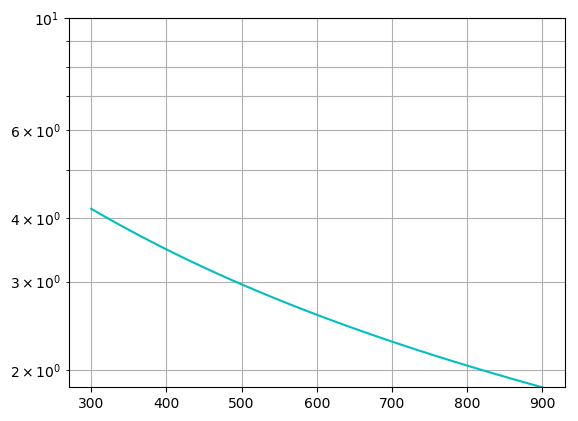

In [17]:
semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
ylim(0,10)

grid(true,which="both")


In [18]:
tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]

3-element Array{tau_phonon_B,1}:
 tau_phonon_B(Function[tauPHNTf, tauPHUTf, tauPHALLTf, tauPHeTfX3, tauPHeTfX1, tauPHBTf, tauPHNPTf], Any[[0.00010021, 0.000101108, 0.000102722, 0.000105055, 0.000108104, 0.000111872, 0.000116356, 0.000121558, 0.000127478, 0.000134115  …  0.145627, 0.145634, 0.14564, 0.145645, 0.145649, 0.145653, 0.145656, 0.145659, 0.14566, 0.145661], 900.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 0, 0.228948, 9.7e-8, 3.823e-21, 0.0])
 tau_phonon_B(Function[tauPHNTf], Any[[0.00010021, 0.000101108, 0.000102722, 0.000105055, 0.000108104, 0.000111872, 0.000116356, 0.000121558, 0.000127478, 0.000134115  …  0.145627, 0.145634, 0.14564, 0.145645, 0.145649, 0.145653, 0.145656, 0.145659, 0.14566, 0.145661], 900.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 0, 0.228948, 9.7e-8, 3.823e-21, 0.0])                           

In [19]:
klscomp=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klscomp=thermalPropsiso(Ts,tauPHL,tauPHTx,tauPHTy,[vL,vT,vT])

61×1×1 Array{Float64,3}:
[:, :, 1] =
 4.180776341784656 
 4.098756661785719 
 4.019522983235581 
 3.9429744288726414
 3.8690089716073803
 3.797524948791183 
 3.728422199489419 
 3.6616028530318423
 3.5969718126629107
 3.5344372670071973
 3.473910726728247 
 3.415307309663229 
 3.358545684258898 
 ⋮                 
 2.0660553381928035
 2.0445774557272114
 2.0235309521372202
 2.0029024611618205
 1.9826791346079655
 1.962848600905662 
 1.9433989257141426
 1.9243186294055894
 1.9055966491703396
 1.8872223339764878
 1.8691854090784021
 1.8514760036839266

In [20]:
xxsp=0.6
xsp=(100-xxsp)/100
Eep=7.0
etha=0.96
thetaD=350.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=2.02
beta=2.0

eps=39
deltaSi=6.39e-10
deltaGe=6.77e-10
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
MSiGecgs(xsp)=(2*(24.305)+(28.0855*(1-xsp)+118.71*xsp))/3
#G=1.033*(1-xsp)+1.017*xsp

a3=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
a1=a3^(1/3)
#vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=(2*(24.305)+(28.0855*(1-xsp)-118.71*xsp))/3
deldelta=deltaSi-deltaGe
mbar=(28.0855*(1-xsp)+118.71*xsp)
GM=(1-xsp)*((28.0855-mbar)/mbar)^2+xsp*((118.71-mbar)/mbar)^2

omegaD=thetaD*kB/hbar
mds=0.5*me#0.427*me
#vt=5880.0

4.55469178e-31

In [21]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1 ./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2 .*intx.^2 ./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=3
    ex1=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .+alphat .*x/2)
    ex2=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .-alphat .*x/2)    
    ext=ex1 ./ex2
    logt=log.(ext)
    return 1 ./(lambda*(A*Eep^2/alphat) .*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1 ./(6.17e11*theta*GM .*intx .^4)
end


function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1) ./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x) .+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=tauPH_C_SA_Af(x) .*(x .^4)*alphat^2 .*exp.(alphat*x) ./(exp.(alphat*x) .-1) .^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*1 ./tauPH_U_SA_Af(x).*
    (1 .-beta*tauPH_C_SA_Af(x) ./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)#(I1t+I2t.^2/I3t)#(kB*thetaD/hbar)^3*(I1t+I2t.^2/I3t)    #4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)    
end
klt_SA_A=Array{Float64,1}(undef,length(Ts))
for Tti in 1:length(Ts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Ts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,
        Efsr[Tti,1,1]/kBe/Ts[Tti])
    #klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2    
end

In [22]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

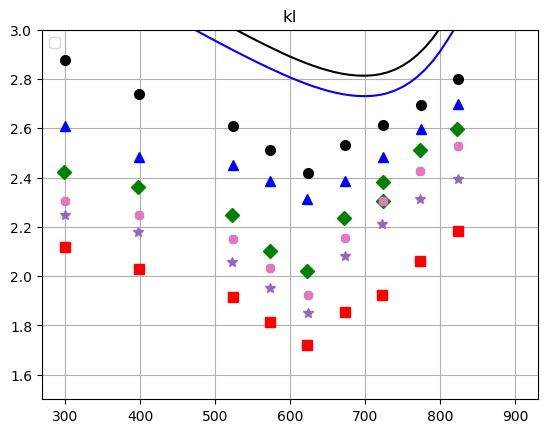

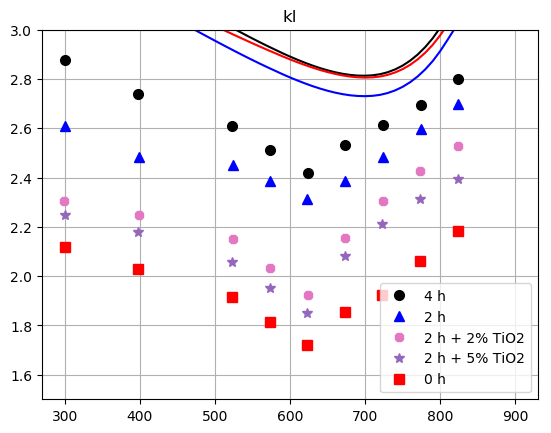

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
No handles with labels found to put in legend.


In [23]:
figure()
title("kl")
plot(Ts,36*klt_SA_A .+kes[:,1,1] .+0.6*kbis[:,1,1],Linestyle="-",color="k")
plot(Ts,34*klt_SA_A .+kes[:,1,1]+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
plot(Ts,28*klt_SA_A .+1.48kes[:,1,1] .+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26*klt_SA_A /+1.3kes[:,1,1] .+0.52*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
ylim(1.5,3.0)
grid()


figure()
title("kl")
plot(Ts,36 .*klt_SA_A .+kes[:,1,1] .+0.6 .*kbis[:,1,1],Linestyle="-",color="k",label="")
plot(Ts,34 .*klt_SA_A .+kes[:,1,1] .+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
#plot(Ts,28*klt_SA_A+1.48kes[:,1,1]+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26 .*klt_SA_A .+1.3kes[:,1,1] .+0.52 .*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k",label="4 h")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b",label="2 h")
#plot(MgSiSn05hKCT+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink",label="2 h + 2% TiO2")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple",label="2 h + 5% TiO2")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="0 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")

ylim(1.5,3.0)
legend(loc="lower right")
grid()


In [24]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

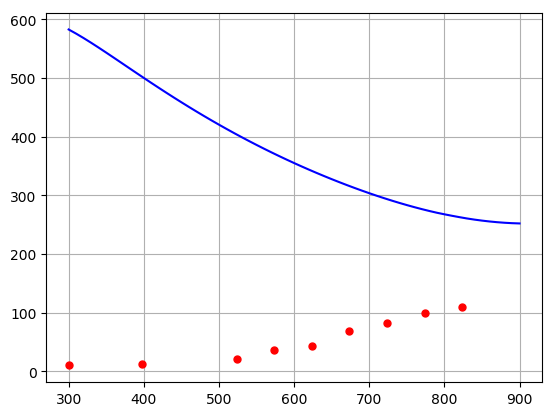

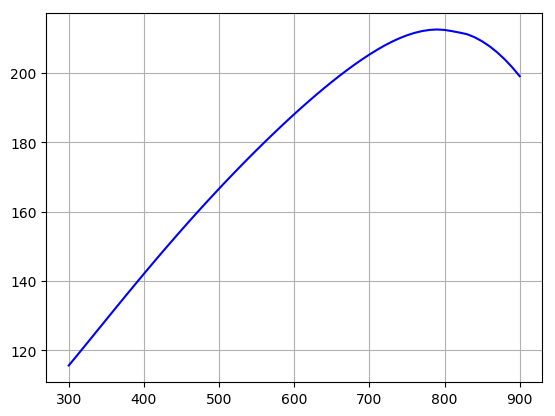

In [25]:

figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()